# Simulación de precios y rendimeintos en empresas de energía

# Objetivos:
 1) Extraer datos de Yahoo Finance, en determinadas empresas.
 
 2) Graficar el movimiento de sus precios en determinados meses.
 
 3) Poder modelar los datos obtenidos para simular datos futuros.
 
 4) Comparar el porcentaje de acertamiento con datos reales.
   ## Objetivos especificos manuales
 
   1)  Aprender a datos directamente de una página web. 
   2) Saber obtener en python, rendimeintos, media, desviación estandar, y poder aplicarlo para graficar. 

   ## Objetivos especificos mentales
   1) Aprender a identificar, el comportamiento que se simula, con los movimientos reales.
   2) Aprender a evaluar el nivel de acertividad.


In [1]:
#importación de las librerias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo", # Datos tomados de Yahoo
                           start=start_date, #De donde comienza el rengo
                           end=end_date) #Donde termina el rango
    return closes['Adj Close']

In [49]:
# Obtuvé los precios
names = ['CVX','ENG.MC', 'PBR', 'ELE.MC'] #nombres de las divisas
start, end = '2018-01-01', '2018-12-31' #rango de fechas dado
closes = get_closes(names=names, start_date=start, end_date=end) 

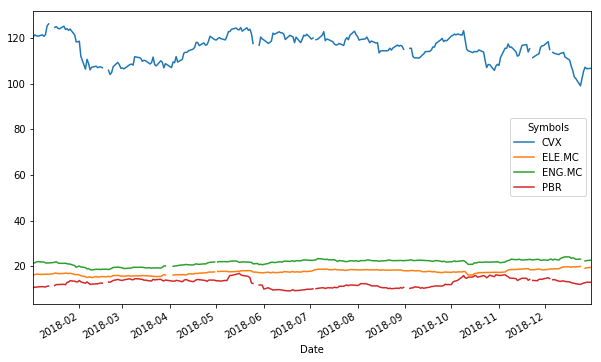

In [47]:
#Grafiqué el movimeinto de los precios
closes.plot(figsize=(10,6)); 



## Calculando rendimientos del 2018

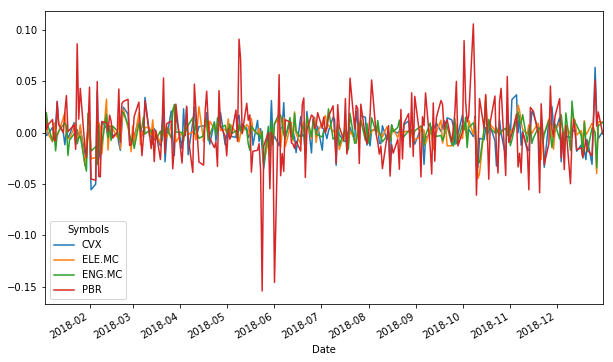

In [23]:
#Calculo y grafica de los rendimientos 
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

## Modelo matematico Normal

La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos. Mientras que los mecanismos que subyacen a gran parte de este tipo de fenómenos son desconocidos, por la enorme cantidad de variables incontrolables que en ellos intervienen, el uso del modelo normal puede justificarse asumiendo que cada observación se obtiene como la suma de unas pocas causas independientes.

Para poder simular los rendimientos de lo que va del año, use la forma normal, o forma 
gaussiana, ayudandome de de las caracteristicas estadisticas de los rendimeintos que se obtivieron durante el 2018. 

Primero obtenemos la media y la desviación estandar, ya que utilizaremos una distribución normal, dada por el siguiente modelo matematico.



![imagen.png](foto.png)

Para esto obtuve la media y la desviación estandar de cada una de las empresas
donde:

+ μ
\mu es la media (también puede ser la mediana, la moda o el valor esperado, según aplique)

+ σ
\sigma es la desviación estándar

+ σ^
2
\sigma^2es la varianza

+ φ
\varphi  representa la función de densidad de probabilidad

#### Límite inferior y superior estrictos para la función de distribución

Para grandes valores de x la función de distribución de la normal estándar (x) es muy próxima a 1 y está muy cerca de 0. Los límites elementales

## Calculando la media y la desviación estandar 

#### Media

A media aritmética, también llamada promedio o media, de un conjunto infinito de números es el valor característico de una serie de datos cuantitativos, objeto de estudio que parte del principio de la esperanza matemática o valor esperado, se obtiene a partir de la suma de todos sus valores dividida entre el número de sumandos. Cuando el conjunto es una muestra aleatoria recibe el nombre de media muestral siendo uno de los principales estadísticos muestrales.

#### Desviación estandar

La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.

El símbolo σ (sigma) se utiliza frecuentemente para representar la desviación estándar de una población, mientras que s se utiliza para representar la desviación estándar de una muestra. La variación que es aleatoria o natural de un proceso se conoce comúnmente como ruido.

La desviación estándar se puede utilizar para establecer un valor de referencia para estimar la variación general de un proceso.



In [6]:
mediaChevron, desviacionChevron= ret.mean()["CVX"], ret.std()['CVX']

In [7]:
mediaChevron, desviacionChevron

(-0.0003867157666739664, 0.0149873452294493)

In [24]:
mediaEnagás, desviacionEnagás= ret.mean()["ENG.MC"], ret.std()['ENG.MC']

In [25]:
mediaEnagás, desviacionEnagás

(0.00027623240206114025, 0.011230607985241633)

In [10]:
mediaPetróleo_Brasileiro, desviacionPetróleo_Brasileiro= ret.mean()["PBR"], ret.std()['PBR']

In [11]:
mediaPetróleo_Brasileiro, desviacionPetróleo_Brasileiro

(0.0011694848016429455, 0.030525070534188)

In [12]:
mediaEndesa, desviacionEndesa= ret.mean()["ELE.MC"], ret.std()['ELE.MC']

In [13]:
mediaEndesa, desviacionEndesa

(0.0007470104849661264, 0.010966496380058961)

## Simularemos rendimientos

In [14]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates) #FUNCION GAUSIANA

In [26]:
simret_Chavron = ret_sim(mediaChevron, desviacionChevron, 191, 1000, '2019-01-01')
simretEnagás= ret_sim(mediaEnagás, desviacionEnagás, 191, 1000, '2019-01-01')
simret_Brasileiro = ret_sim(mediaPetróleo_Brasileiro, desviacionPetróleo_Brasileiro, 191, 1000, '2018-01-01')
simret_Endesa= ret_sim(mediaEndesa, desviacionEndesa, 191, 1000, '2019-01-01')


In [51]:
# Obtenemos los precios de cierre

#PRECIO ULTIMO DE LA ACCION, POR EL PRODUCTO ACUMULADO DE LOS RENDIMIENTOS
simcloses_Chavron  = closes.iloc[-1].CVX*((1+simret_Chavron).cumprod())
simclosesEnagás = closes.iloc[-1]["ENG.MC"]*((1+simretEnagás).cumprod())
simcloses_Brasileiro = closes.iloc[-1].PBR*((1+simret_Brasileiro).cumprod())
simcloses_Endesa = closes.iloc[-1]["ELE.MC"]*((1+simret_Endesa).cumprod())

### Graficaré 1,000 escenarios de los posibles rendimeintos que podemos obtener

# Grafica para los rendimeintos simulados de Chevron Corporation

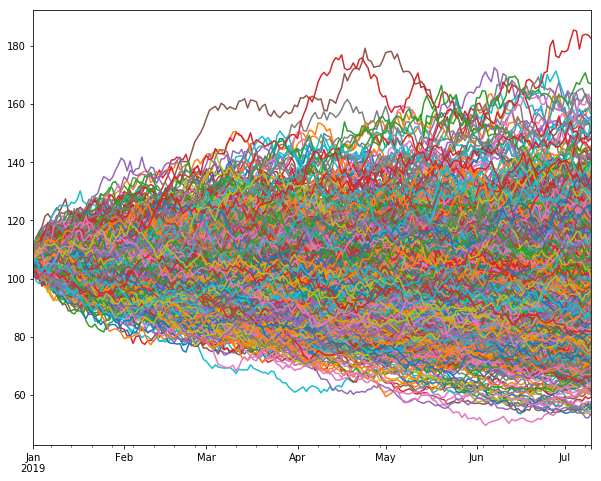

In [17]:
simcloses_Chavron.plot(figsize=(10,8),legend=False);

# Grafica para los rendimeintos simulados de Enagás, S.A.

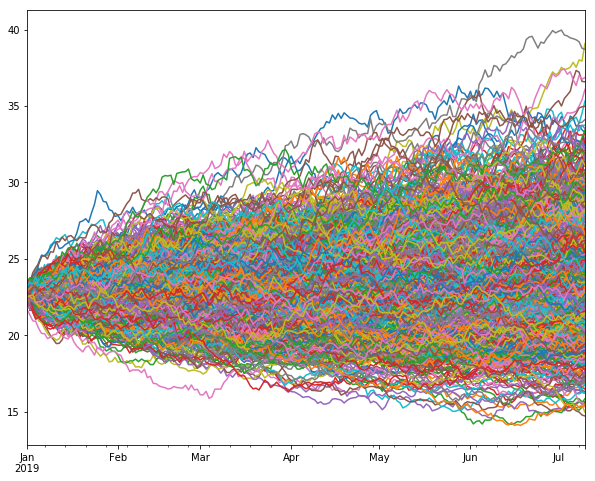

In [28]:
simclosesEnagás.plot(figsize=(10,8),legend=False);

# Grafica para los rendimeintos simulados de Petróleo Brasileiro S.A. - Petrobras

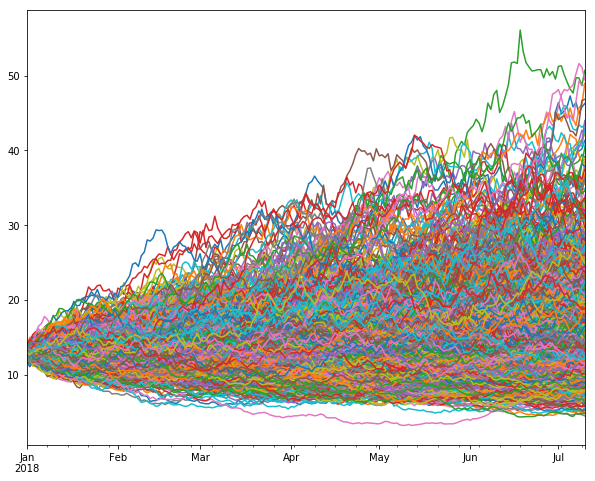

In [19]:
simcloses_Brasileiro.plot(figsize=(10,8),legend=False);

# Grafica para los rendimeintos simulados de Endesa, Sociedad Anonima

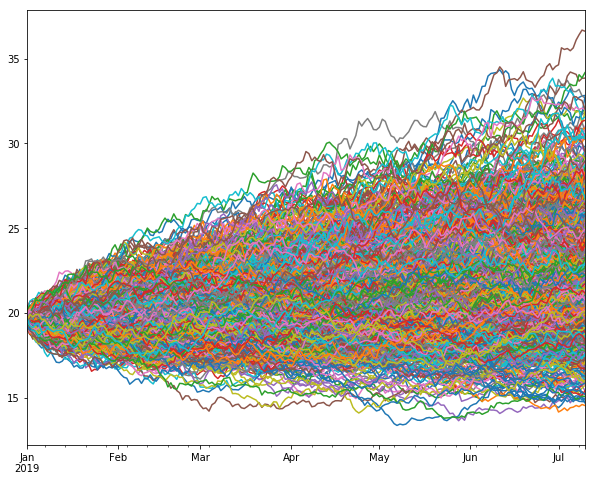

In [30]:
simcloses_Endesa.plot(figsize=(10,8),legend=False);

Despues de obtener futuros/posibles valores reales vamos a calcular las probabilidades con base en una tasa de interés anual deseada del $15\%$, de cada una de las empresas y las compararemos con los valores reales obtenidos durante estos 6 meses.

## Chevron Corporation

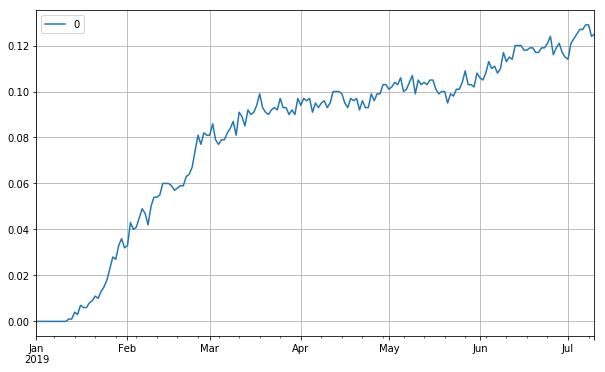

In [65]:
K_Chevron = (1+0.15)*closes.iloc[-1].CVX
prob = pd.DataFrame((simcloses_Chavron>K_Chevron).sum(axis=1)/1000)

prob.plot(figsize=(10,6), grid=True);

In [66]:
#El precio que deberi igual o superar es
K_Chevron

122.65659141540526

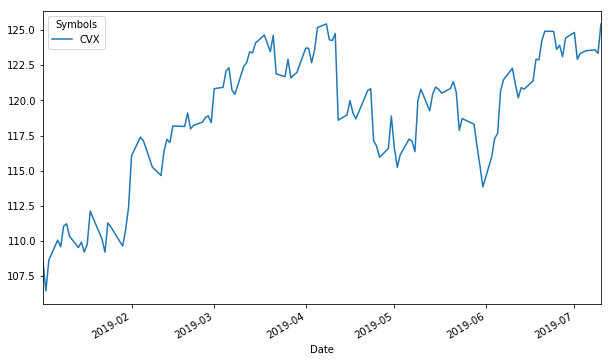

In [73]:
start, end = '2019-01-01', '2019-07-10' #importa valores en esta fecha
name = ['CVX'] #fr 
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

La probabilidad de que alcancé los 122.65 pesos es demasiado baja ya que no llega no al 15 porciento de posibilidad, y es correcta porque durante los primeros 3 meses no supero el precio fijado, el siguiente mes lo supero en ciertas ocasiones por apenas 3 pesos, pero durante el siguiete trimestre no supero el precio, y solo al final, un poco aumento en ciertas ocasiones entre $2 y $3.

## Enagás, S.A.

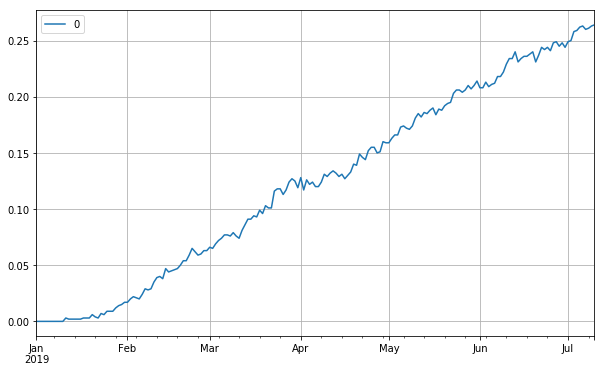

In [67]:
K_Enagás = (1+0.15)*closes.iloc[-1]["ENG.MC"]
prob = pd.DataFrame((simclosesEnagás>K_Enagás).sum(axis=1)/1000)

prob.plot(figsize=(10,6), grid=True);

In [68]:
#El precio que deberi igual o superar es
K_Enagás

26.089504146575926

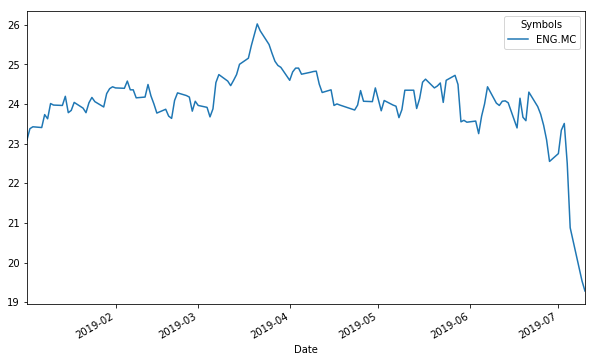

In [76]:
start, end = '2019-01-01', '2019-07-10' #importa valores en esta fecha
name = ['ENG.MC'] #fr 
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

Durante esto primeros 6 meses la posibilidad de que el precio arrevazara los 26.08 pesos fue incrementando desde 0 a 25 por ciento, porcentaje que considero muy bajo, y como se esperaba, los precios no llegaron a superar ese 15 porciento extra, más que en el mes de abril,en una ocación. 

## Petróleo Brasileiro S.A. - Petrobras

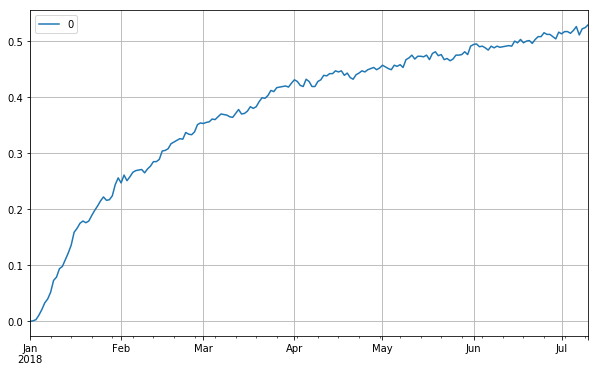

In [69]:
K_Brasileiro = (1+0.15)*closes.iloc[-1].PBR
prob = pd.DataFrame((simcloses_Brasileiro>K_Brasileiro).sum(axis=1)/1000)

prob.plot(figsize=(10,6), grid=True);

In [70]:
#El precio que deberi igual o superar es
K_Brasileiro

14.907383441925047

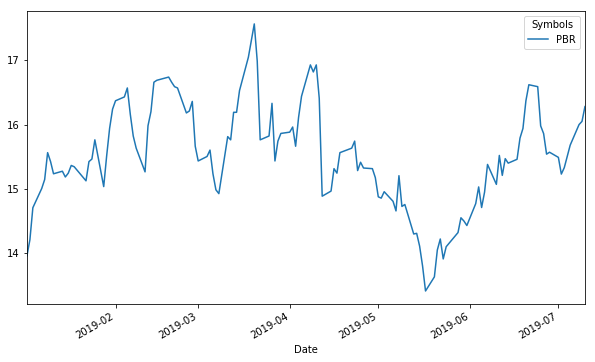

In [75]:
start, end = '2019-01-01', '2019-07-10' #importa valores en esta fecha
name = ['PBR'] #fr 
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

Durante los primeros 4 meses aumento hasta un 40% la posibilidad de que el precio superara los 14.90 pesos y de el mes de abril al presente julio, supero el 50 porciento de posibilidades, en cambio a esta estadistica, de los primeros días de enero y duranto5 meses el precio estuvo siempre arriba de los $ 14.90, pero a mediados de mayo bajo considerablemente, incluso a no llegar a superar la meta, pero después y hasta el momento, el precio se mantiene arriba de el 15% esperado. 

## Endesa, Sociedad Anonima

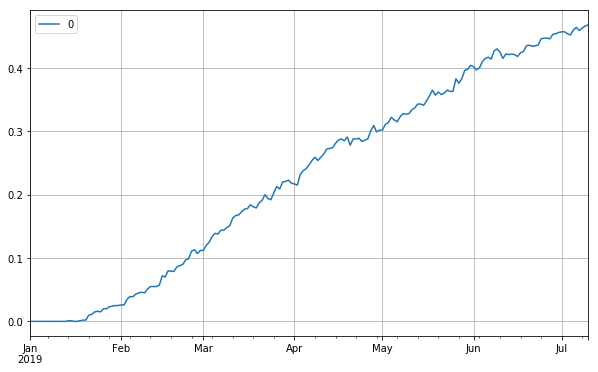

In [71]:
K_Endesa = (1+0.15)*closes.iloc[-1]["ELE.MC"]
prob = pd.DataFrame((simcloses_Endesa>K_Endesa).sum(axis=1)/1000)

prob.plot(figsize=(10,6), grid=True);

In [72]:
#El precio que deberi igual o superar es
K_Endesa

22.431203079223632

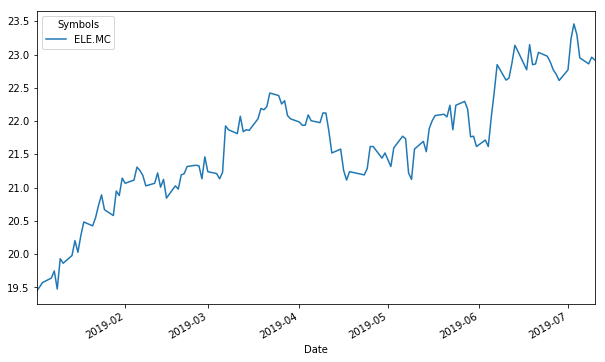

In [74]:
start, end = '2019-01-01', '2019-07-10' #importa valores en esta fecha
name = ['ELE.MC'] #fr 
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

El crecimiento del porcentaje para esta empresa es lenta los primero 3 meses, pues solo se considera en un 10 porciento que igualara o aumentara el precio de 22.43, pero los siguientes 3 meses alcanza el 40 porciento, y en el ultimo mes llega casi al 50,siguen siendo muy bajas, pero alcabo de los primeros 3 meses y poquito más alcanza los 22.4 pero solo llega a 22.5 en un momento, despues vulve a bajar, y no es hasta el mes de junio cuando sube y alcanza los 23, despues se mantiene así hasta el pasado 10 de julio.  

## REFERENCIAS:
Wikipedia, Ditribución Normal, Esta página se editó por última vez el 3 jul 2019 a las 20:34, consultada el día 10 de julio del 2019